#### Project objective: understand the patterns and trends in bike usage and make predictions about future demand
#### Projct method: Prediction 
#### Special Type: Time Series Prediction / forecasting 
#### Project purpose: build a predictive model that can forecast bike rental demand to optimize bike allocation and improve the efficiency.

#Dataset: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

In [2]:
import pandas as pd 
import numpy as np

# Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#DS libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [4]:
import sklearn
print(sklearn.__version__)

1.5.2


Variable Name : Description	

instant	ID	: index <br>
dteday	: date <br>
season	: 1:winter, 2:spring, 3:summer, 4:fall <br>
yr	: (0: 2011, 1: 2012) <br>
mnth : (1 to 12) <br>
hr	: (0 to 23) <br>
holiday	Feature	: Binary	weather day is holiday or not  <br>
weekday	Feature	: Categorical	day of the week <br>
workingday	: neither weekend nor holiday is 1, otherwise is 0 <br>
weathersit	: 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
temp	: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)	<br>
atemp	: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)	<br>
hum	: humidity values are divided to 100 (max) <br>
windspeed	: wind speed values are divided to 67 (max) <br>
casual	: count of casual users <br>
registered	: count of registered users <br>
cnt	: count of total rental bikes including both casual and registered <br>

In [5]:
df2 = pd.read_csv(r"day.csv")

In [6]:
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
#type cast datetime columns to date
df2["dteday"] = pd.to_datetime(df2["dteday"])

In [9]:
df2.describe(include='all').T

,count,mean,min,25%,50%,75%,max,std
instant,731.0,366.0,1.0,183.5,366.0,548.5,731.0,211.165812
dteday,731,2012-01-01 00:00:00,2011-01-01 00:00:00,2011-07-02 12:00:00,2012-01-01 00:00:00,2012-07-01 12:00:00,2012-12-31 00:00:00,NaN
season,731.0,2.49658,1.0,2.0,3.0,3.0,4.0,1.110807
yr,731.0,0.500684,0.0,0.0,1.0,1.0,1.0,0.500342
mnth,731.0,6.519836,1.0,4.0,7.0,10.0,12.0,3.451913
holiday,731.0,0.028728,0.0,0.0,0.0,0.0,1.0,0.167155
weekday,731.0,2.997264,0.0,1.0,3.0,5.0,6.0,2.004787
workingday,731.0,0.683995,0.0,0.0,1.0,1.0,1.0,0.465233
weathersit,731.0,1.395349,1.0,1.0,1.0,2.0,3.0,0.544894
temp,731.0,0.495385,0.05913,0.337083,0.498333,0.655417,0.861667,0.183051


In [10]:
#df2.tail(5)

## Visualizations

/Users/mo/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


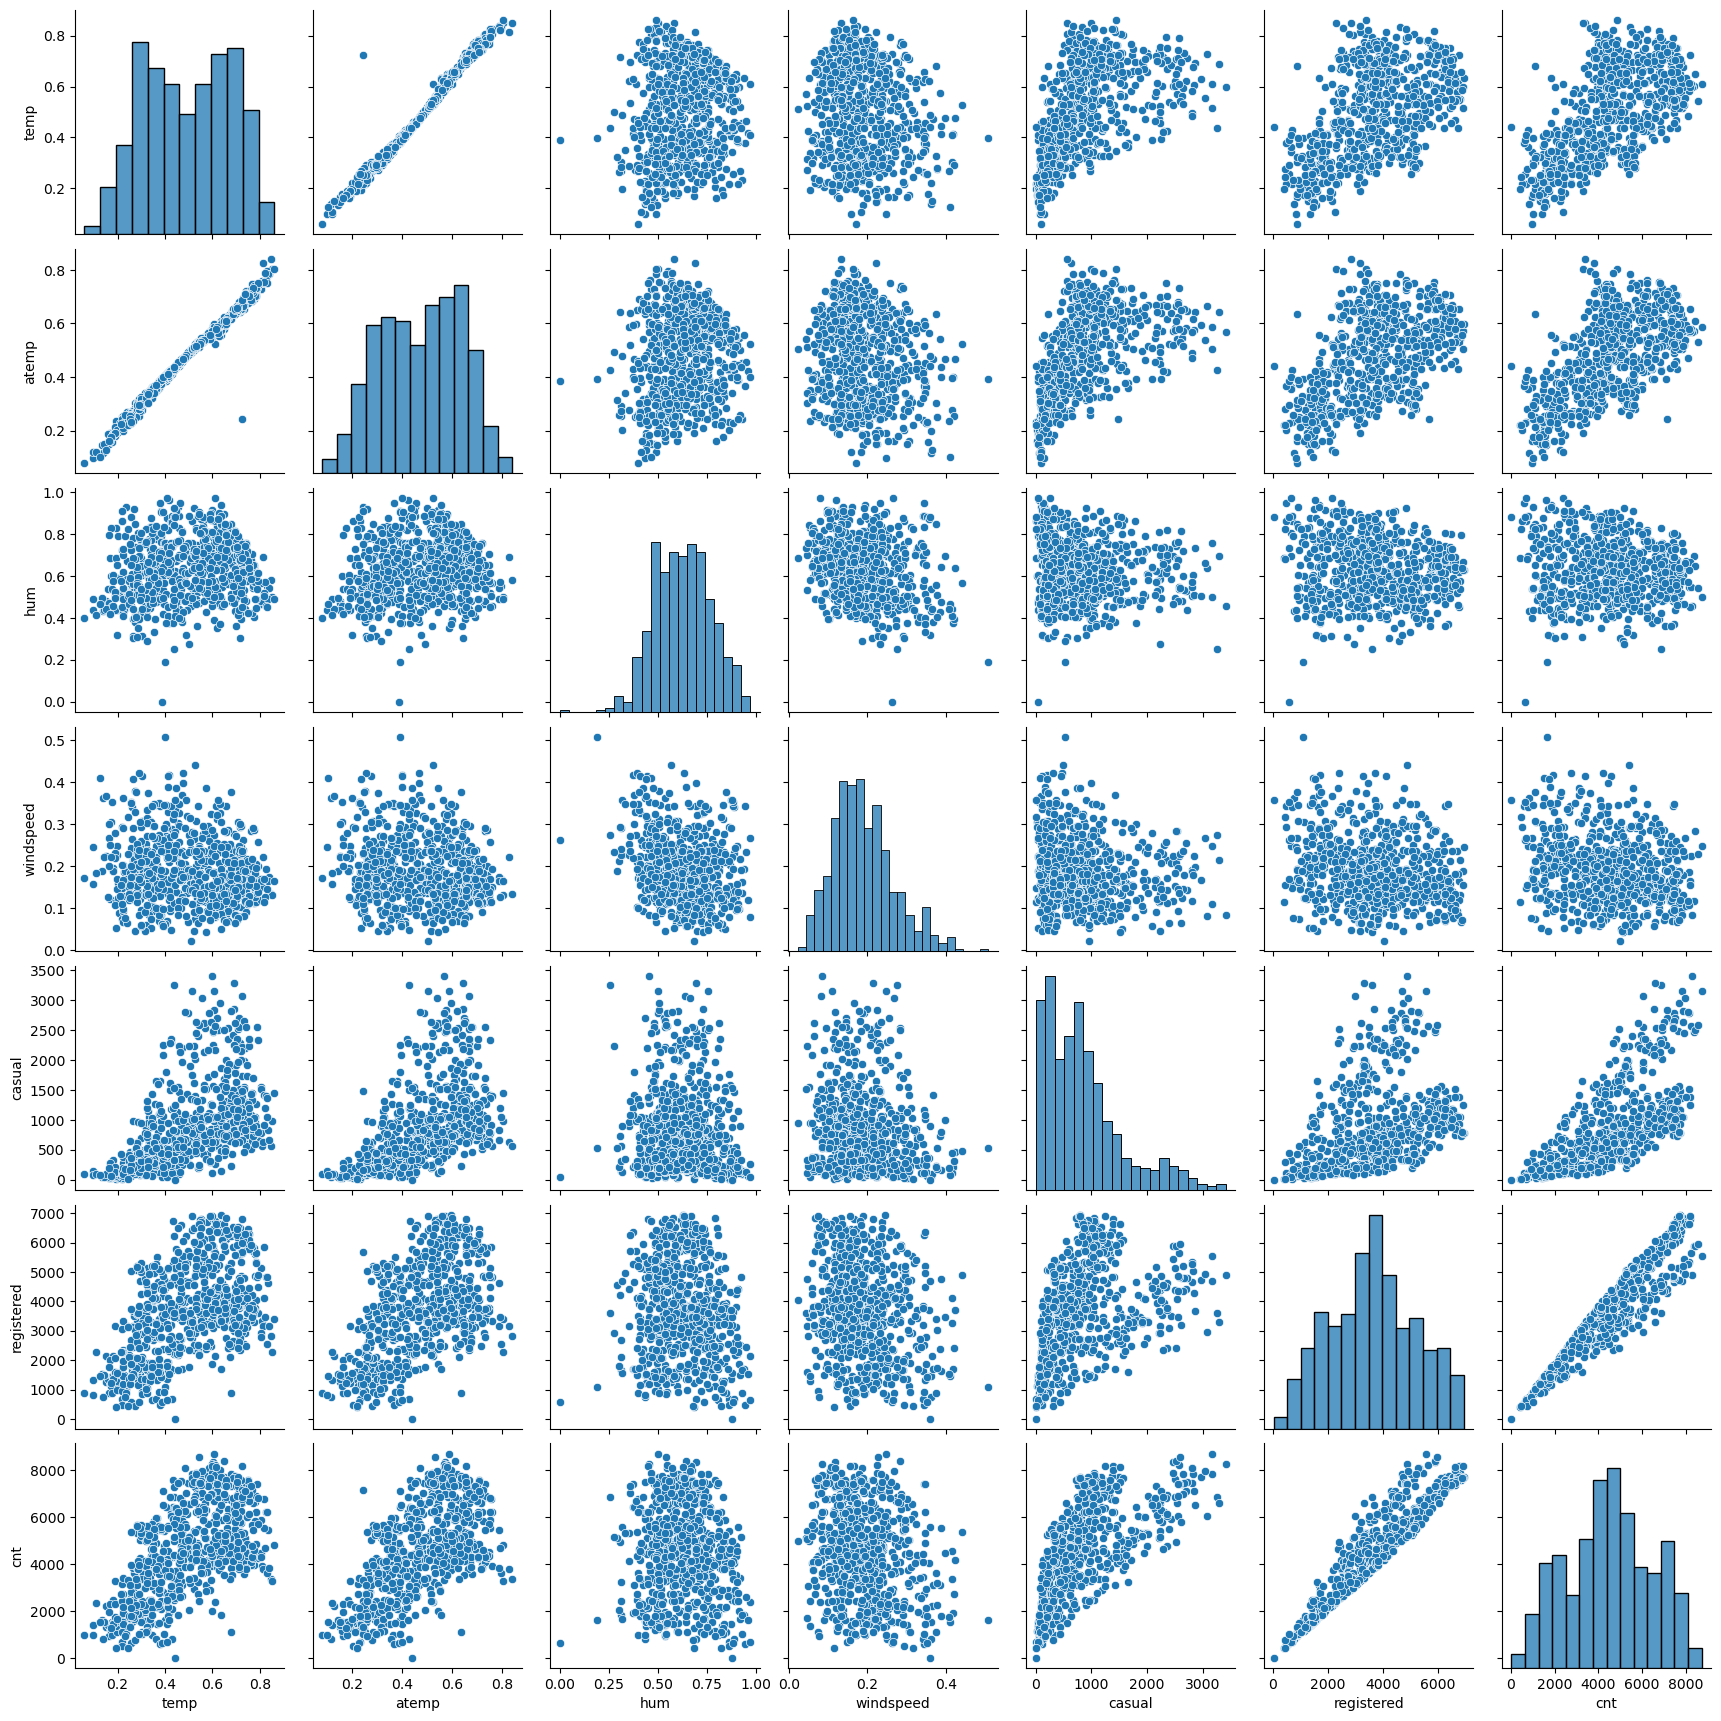

In [11]:
#Numerical Variables

sns.pairplot(df2[["temp","atemp","hum","windspeed","casual","registered","cnt"]])
plt.show()

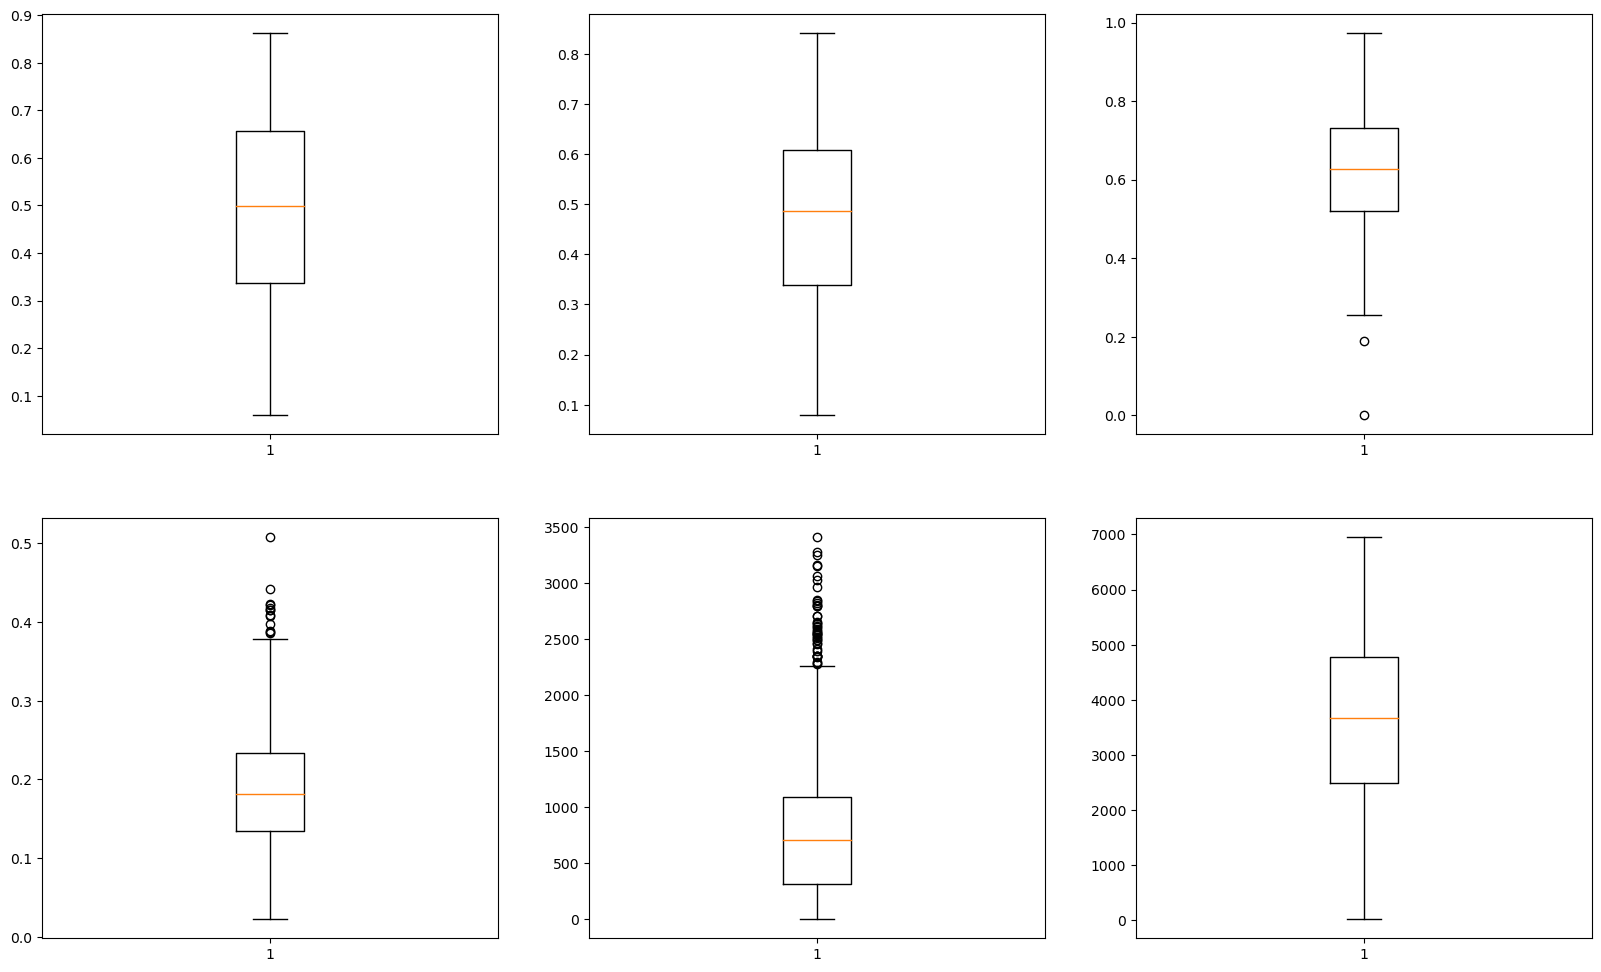

In [12]:
#Plotting box plot of continuous variables

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.boxplot(df2["temp"])
plt.subplot(2,3,2)
plt.boxplot(df2["atemp"])
plt.subplot(2,3,3)
plt.boxplot(df2["hum"])
plt.subplot(2,3,4)
plt.boxplot(df2["windspeed"])
plt.subplot(2,3,5)
plt.boxplot(df2["casual"])
plt.subplot(2,3,6)
plt.boxplot(df2["registered"])
plt.show()

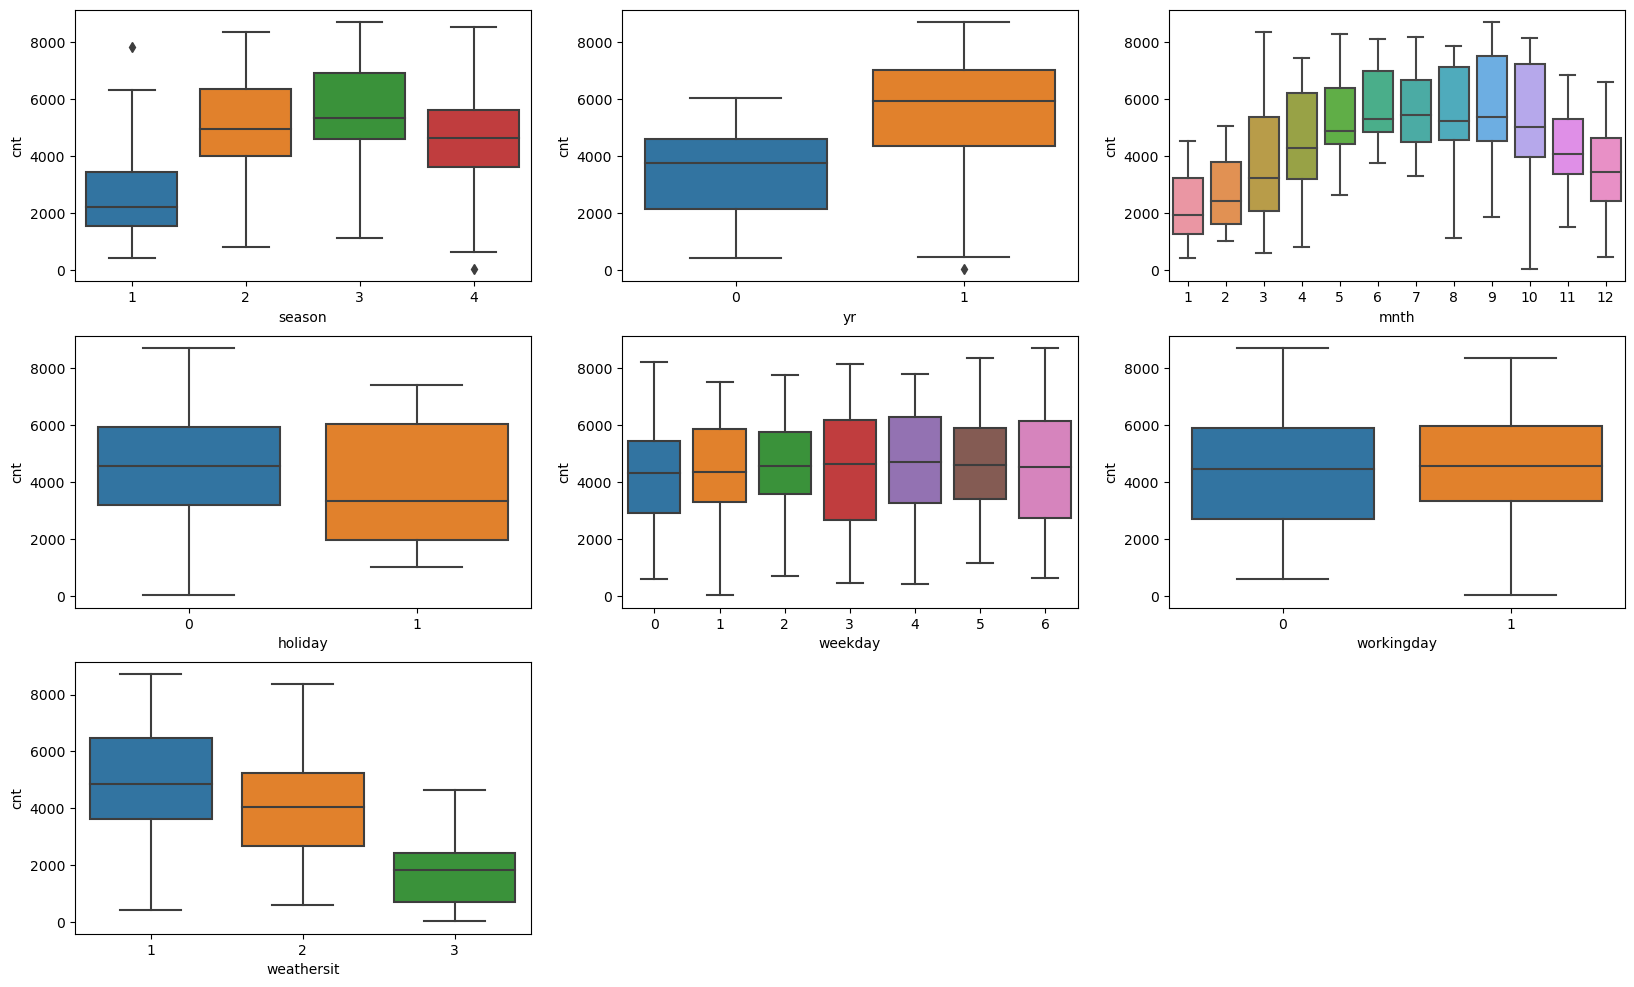

In [13]:
#Plotting box plot of categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df2)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df2)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df2)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df2)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df2)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df2)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df2)
plt.show()

In [14]:
#Other visuoalizations for Numbmerical Variables

In [15]:
Numerical= ["temp","atemp","hum","windspeed","casual","registered","cnt"]

In [16]:
Numerical_cnts = ["casual","registered","cnt"]

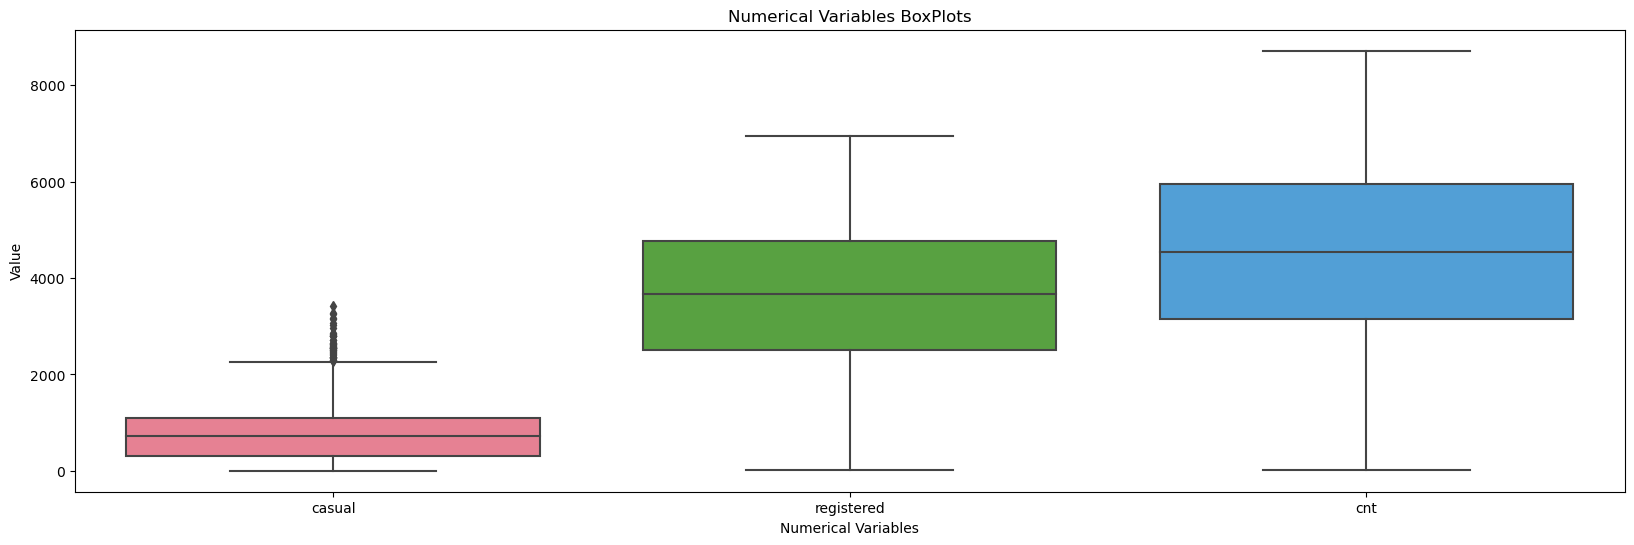

In [17]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df2[Numerical_cnts], palette='husl')
plt.xlabel('Numerical Variables')
plt.ylabel('Value')
plt.title('Numerical Variables BoxPlots')
plt.show()

<Axes: >

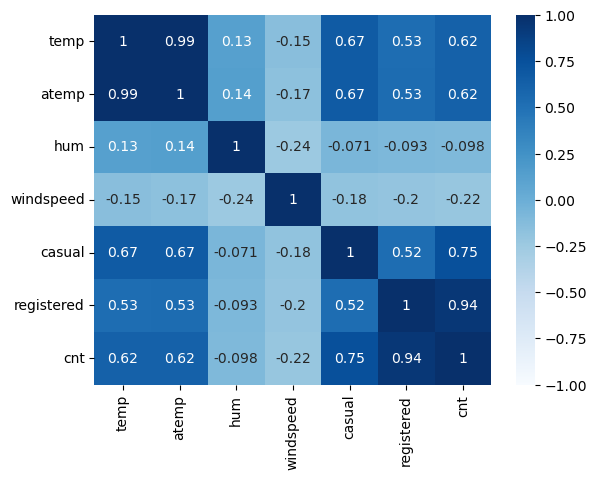

In [18]:
sns.heatmap(df2[Numerical].corr(method='spearman', numeric_only=True), cmap='Blues',vmin=-1, vmax=1, annot=True)

## Data preparation 

In [19]:
# dropping variables (instant,dteday,casual,registered)

In [20]:
df2.drop(columns=["instant","dteday","casual","registered"],axis=1,inplace =True)

In [21]:
df2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [22]:
#One hot encoding using dummy for season and weathersit

In [23]:
df2_= pd.get_dummies(df2, columns=['season'], drop_first = True, dtype=int)

In [24]:
df2_.rename(columns={'season_2':"season_spring", 'season_3':"season_summer", 'season_4':"season_fall"},inplace=True)
df2_.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_fall
0,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,0,0,0
1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,0,0,0
2,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,0,0,0
3,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,0,0,0
4,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,0,0,0


In [25]:
df2_['weathersit'].unique()

array([2, 1, 3])

In [26]:
df2_= pd.get_dummies(df2_, columns=['weathersit'], drop_first = True, dtype=int)

In [27]:
df2_.rename(columns={'weathersit_2':"weather_mist", 'weathersit_3':"weather_light"},inplace=True)
df2_.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_fall,weather_mist,weather_light
0,0,1,0,6,0,0.344167,0.363625,0.805833,0.160446,985,0,0,0,1,0
1,0,1,0,0,0,0.363478,0.353739,0.696087,0.248539,801,0,0,0,1,0
2,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,0,0,0,0,0
3,0,1,0,2,1,0.200000,0.212122,0.590435,0.160296,1562,0,0,0,0,0
4,0,1,0,3,1,0.226957,0.229270,0.436957,0.186900,1600,0,0,0,0,0


In [28]:
df2_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             731 non-null    int64  
 1   mnth           731 non-null    int64  
 2   holiday        731 non-null    int64  
 3   weekday        731 non-null    int64  
 4   workingday     731 non-null    int64  
 5   temp           731 non-null    float64
 6   atemp          731 non-null    float64
 7   hum            731 non-null    float64
 8   windspeed      731 non-null    float64
 9   cnt            731 non-null    int64  
 10  season_spring  731 non-null    int64  
 11  season_summer  731 non-null    int64  
 12  season_fall    731 non-null    int64  
 13  weather_mist   731 non-null    int64  
 14  weather_light  731 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.8 KB


In [29]:
#Creating a variable for the Quarter of year & weekend or Weekday 

In [30]:
df2_["Q1"] = df2_["mnth"].apply(lambda x: 1 if x<=3 else 0)
df2_["Q2"] = df2_["mnth"].apply(lambda x: 1 if 4<=x<=6 else 0)
df2_["Q3"] = df2_["mnth"].apply(lambda x: 1 if 7<=x<=9 else 0)

In [31]:
df2_["weekend"] = df2_["weekday"].apply(lambda x: 0 if 1<=x<=5 else 1)

In [32]:
#df2_.drop(columns=["mnth"],axis=1,inplace =True)
df2_.drop(columns=["weekday"],axis=1,inplace =True)
df2_.drop(columns=["workingday"],axis=1,inplace =True)

In [33]:
df2_.head()

,yr,mnth,holiday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_fall,weather_mist,weather_light,Q1,Q2,Q3,weekend
0,0,1,0,0.344167,0.363625,0.805833,0.160446,985,0,0,0,1,0,1,0,0,1
1,0,1,0,0.363478,0.353739,0.696087,0.248539,801,0,0,0,1,0,1,0,0,1
2,0,1,0,0.196364,0.189405,0.437273,0.248309,1349,0,0,0,0,0,1,0,0,0
3,0,1,0,0.200000,0.212122,0.590435,0.160296,1562,0,0,0,0,0,1,0,0,0
4,0,1,0,0.226957,0.229270,0.436957,0.186900,1600,0,0,0,0,0,1,0,0,0


In [34]:
df2_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             731 non-null    int64  
 1   mnth           731 non-null    int64  
 2   holiday        731 non-null    int64  
 3   temp           731 non-null    float64
 4   atemp          731 non-null    float64
 5   hum            731 non-null    float64
 6   windspeed      731 non-null    float64
 7   cnt            731 non-null    int64  
 8   season_spring  731 non-null    int64  
 9   season_summer  731 non-null    int64  
 10  season_fall    731 non-null    int64  
 11  weather_mist   731 non-null    int64  
 12  weather_light  731 non-null    int64  
 13  Q1             731 non-null    int64  
 14  Q2             731 non-null    int64  
 15  Q3             731 non-null    int64  
 16  weekend        731 non-null    int64  
dtypes: float64(4), int64(13)
memory usage: 97.2 KB


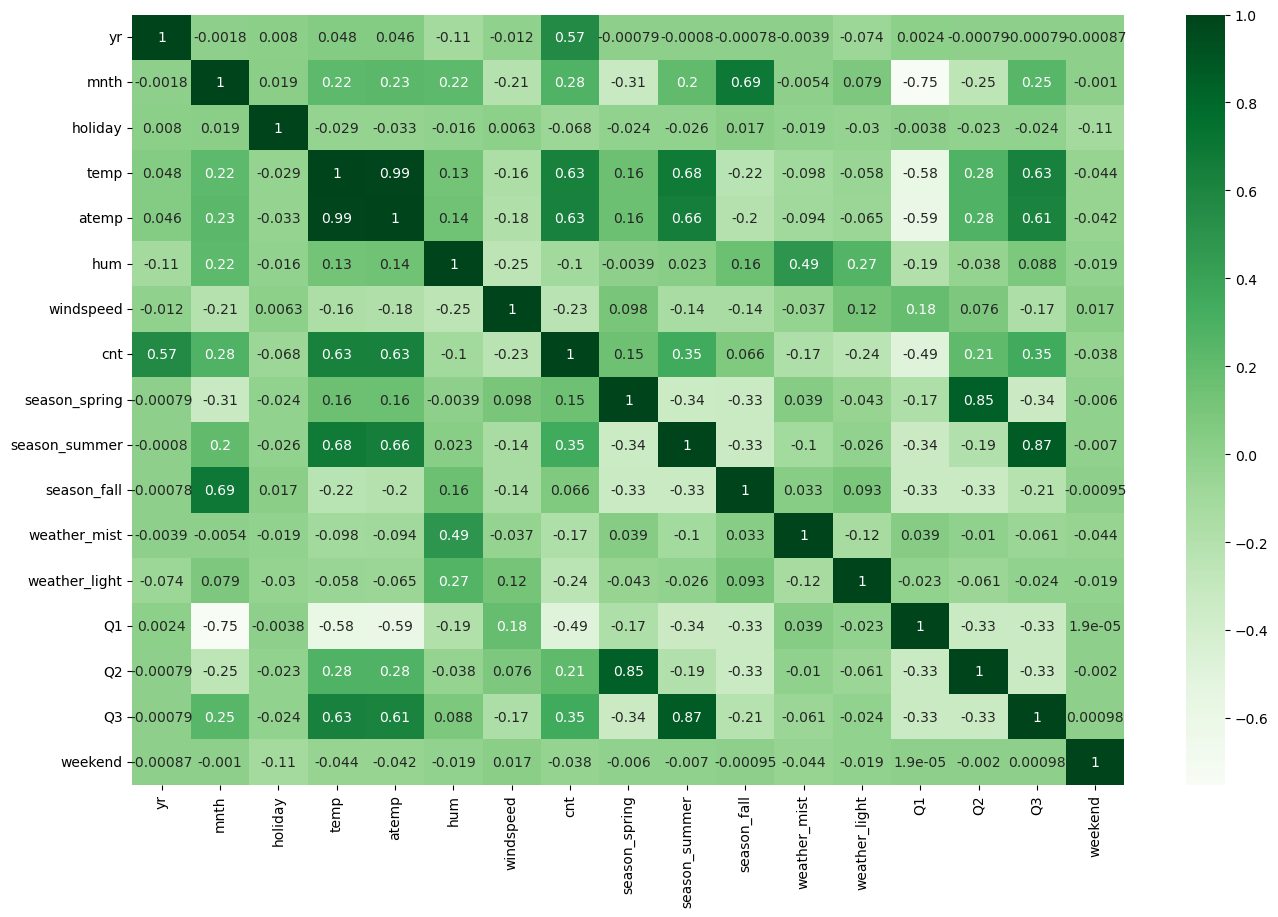

In [35]:
plt.figure(figsize = (16, 10))
sns.heatmap(df2_.corr(), annot = True, cmap="Greens")
plt.show()

In [36]:
df2_.drop(columns=["temp"],axis=1,inplace =True)
df2_.head()

,yr,mnth,holiday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_fall,weather_mist,weather_light,Q1,Q2,Q3,weekend
0,0,1,0,0.363625,0.805833,0.160446,985,0,0,0,1,0,1,0,0,1
1,0,1,0,0.353739,0.696087,0.248539,801,0,0,0,1,0,1,0,0,1
2,0,1,0,0.189405,0.437273,0.248309,1349,0,0,0,0,0,1,0,0,0
3,0,1,0,0.212122,0.590435,0.160296,1562,0,0,0,0,0,1,0,0,0
4,0,1,0,0.229270,0.436957,0.186900,1600,0,0,0,0,0,1,0,0,0


In [37]:
col = df2_.pop('cnt')
df2_.insert(15, col.name, col)

In [38]:
#showing the re-arrangement of the target column to be the last one 
df2_.head()

,yr,mnth,holiday,atemp,hum,windspeed,season_spring,season_summer,season_fall,weather_mist,weather_light,Q1,Q2,Q3,weekend,cnt
0,0,1,0,0.363625,0.805833,0.160446,0,0,0,1,0,1,0,0,1,985
1,0,1,0,0.353739,0.696087,0.248539,0,0,0,1,0,1,0,0,1,801
2,0,1,0,0.189405,0.437273,0.248309,0,0,0,0,0,1,0,0,0,1349
3,0,1,0,0.212122,0.590435,0.160296,0,0,0,0,0,1,0,0,0,1562
4,0,1,0,0.229270,0.436957,0.186900,0,0,0,0,0,1,0,0,0,1600


In [39]:
X = df2_.iloc[:,:-1]
y = df2_.iloc[:,-1]

## Splitting the data

In [40]:
# We specify this so that the train and test data set always have the same rows, respectively
bike_sharing_train, bike_sharing_test = train_test_split(df2_, train_size = 0.7, test_size = 0.3, random_state = 100)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 100)

Scaling 

In [57]:
scaler = MinMaxScaler()

In [58]:
X_train_scaled = scaler.fit_transform(X_train)

In [59]:
X_test_scaled = scaler.transform(X_test)

In [60]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

# Models 

In [64]:
# Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [65]:
rfe = RFE(lm, n_features_to_select=12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [66]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 3),
 ('holiday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('weather_mist', True, 1),
 ('weather_light', True, 1),
 ('Q1', False, 2),
 ('Q2', True, 1),
 ('Q3', True, 1),
 ('weekend', False, 4)]